# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import scipy.stats as stats

In [75]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [76]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


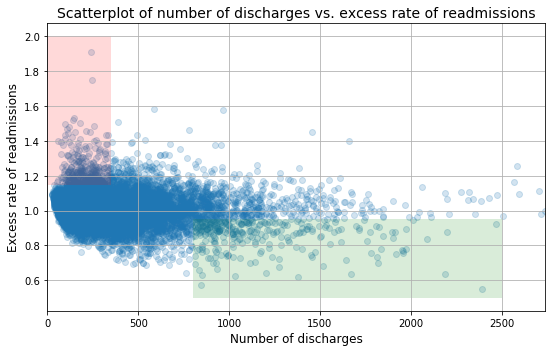

In [77]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## A. Do you agree with the above analysis and recommendations? Why or why not?

The analysis above does not provide enough evidence to draw conclusions. The analysis based on only one scatter plot of the data, with no supporting statistical analysis to prove the claims. For that reason, I don't agree with the above report.Critics as follows;

+ Conclusions were not back up with a solid statistical analysis and Hypothesis testing for proof. .There is no evidence that  rate of readmissions is trending down with increasing number of discharges.  The correlation coefficient was not calculated. It is difficult to say that according to the scatter plot.

+ The entire data set must be considered, including the very dense collection of points in the center. It is not clear why less than 100 and greater than 1000 were used.  This means the calculated percentages of hospitals with excess readmission rate (63% and 44%) is only for the two groups missing a big chunk of the hospitals in the population. And also green and red areas are not so meaningfull and it is not abvious why these areas are selected.

+ It is also curious that the only statistical evidence involved small hospitals defined as less than 100. However in the recommendation part, small capacity hospitals was defined as hospitals with number of discharges <300 which can create confusion.

+  As regulatory policy recommendations, the statement of "Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions" might be true. But there might be some other factors causing this particular situtation such as insurance and doctor ratings not available in the dataset. Recommendations are given without any solid analysis.

+ The missing data was handled properly. 

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

In [78]:
df = clean_hospital_read_df

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


In [80]:
df.duplicated().sum()

0

In [81]:
df.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio         81
Predicted Readmission Rate       81
Expected Readmission Rate        81
Number of Readmissions           81
Start Date                        0
End Date                          0
dtype: int64

In [82]:
# drop footnote column
df.drop(columns= ['Footnote'], inplace=True, errors='ignore')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 11 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(4), int32(1), int64(1), object(5)
memory usage: 1.0+ MB


In [84]:
# drop 81 NaN values out of 11578. 
df = df.dropna(subset=['Excess Readmission Ratio','Predicted Readmission Rate','Expected Readmission Rate', 'Number of Readmissions'])

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 11 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null int32
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(4), int32(1), int64(1), object(5)
memory usage: 1.0+ MB


In [86]:
df.isnull().sum()

Hospital Name                 0
Provider Number               0
State                         0
Measure Name                  0
Number of Discharges          0
Excess Readmission Ratio      0
Predicted Readmission Rate    0
Expected Readmission Rate     0
Number of Readmissions        0
Start Date                    0
End Date                      0
dtype: int64

In [87]:
df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013


### 1. Setup an appropriate hypothesis test.

**Null Hypothesis :** There is no significant relationship between number of discharge and the excess readmission.

**Alternative Hypothesis :** There is significant correlation between number of discharge and number of readmission.

Define the test statistic as the Pearson-R (correlation coefficient)

Significant level: 95%

In [88]:
df.corr()

,Provider Number,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
Provider Number,1.000000,-0.008849,-0.012112,-0.009049,-0.003710,-0.009099
Number of Discharges,-0.008849,1.000000,-0.097398,-0.135163,-0.131091,0.791272
Excess Readmission Ratio,-0.012112,-0.097398,1.000000,0.200039,-0.031104,0.117600
Predicted Readmission Rate,-0.009049,-0.135163,0.200039,1.000000,0.965420,0.361033
Expected Readmission Rate,-0.003710,-0.131091,-0.031104,0.965420,1.000000,0.330527
Number of Readmissions,-0.009099,0.791272,0.117600,0.361033,0.330527,1.000000


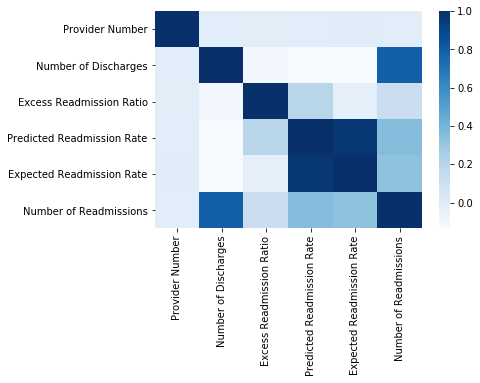

In [104]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix, cmap='Blues')

In [90]:
# Calculate the correlation coefficient
r=stats.pearsonr(df['Number of Discharges'], df['Excess Readmission Ratio'])
print("correlation coefficient of two data is:",r[0])

correlation coefficient of two data is: -0.09739794351079353


#### 2. Compute and report the observed significance value (or p-value) &   3. Report statistical significance for  αα  = .01.

In [99]:
def check_significance(p_val, alpha):
    if p_val < alpha:
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")
        
# conduct hypothesis test for pearson correlation coefficient

discharges = df[df['Number of Discharges'] > 0]['Number of Discharges']
readmission = df[df['Number of Discharges'] > 0]['Excess Readmission Ratio']
pho, p_val = stats.pearsonr(discharges, readmission)

print('correlation coefficient:',pho)
print('p value =',p_val)
check_significance(p_val, alpha=0.01)

correlation coefficient: -0.09739794351079353
p value = 1.222547377680967e-25
The null hypothesis can be rejected


**Conclusion:** There is a statistically significant correlation (p-value = 1.22 e-25) for a hospital's number of discharges and their excess readmission ratio.

### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

**Practical significance**  is defined as the relationships between variables of the real-world applications. **A statistical significance** shows the probability of the relationship that exists between two or more variables. It takes into account variance and means. It is not necessary for the variables to have statistical significance in order to have practical significance. The two significances may be dependent on each other in some cases.

Practical significance explains the relevance of the study under consideration. It is concerned with the usefulness of the obtained result in the real world. It implies the existence of a relationship between variables and the real world. It arises from the probability of the result from decision making. It is affected by many external factors like time, cost, conditions, factors etc

Statistical significance is solely a factor of p-value, while practical significance accounts accounts for "effect size".¶
This is an important difference because it's easy to find statistical significance by simply inflating our test's sample size (n).
Effect size emphasises the size of the difference rather than confounding this with sample size.
Effect size allows us to move beyond the simplistic, 'Does it work or not?' to the far more sophisticated, 'How well does it work in a range of contexts?

In this case, we have statistical signicance but not practical significance. 
The p-value = 1.22 e-25, but the effect size for our correlation coefficient (r = -0.097) is considered very small (or "insignificant"). This changes the recommendation to the client by forcing us to retract the assumption that excess readmission can be attributed to hospital size. Moreover, it's not evident that a hospital's readmission rate can be accounted for by the amount of "resources" the hospital has. Thus, it's no longer relevant to recommended that hospitals demonstrate upgraded resource allocation and/or consolidate their facilities.

### 5.Look at the scatterplot above.
   + **What are the advantages and disadvantages of using this plot to convey information?**
   + **Construct another plot that conveys the same information in a more direct manner.**

**Advantages:**
- good for visulizing relationship between  number of discharges and excess readmission rate, and shows the density of the point distribution across both the x & y axis.

**Disadvantages:**
- difficult to understand the meaning of green and red areas. 
- no legend or explanation like "correlation coefficient", "p_value", etc.

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


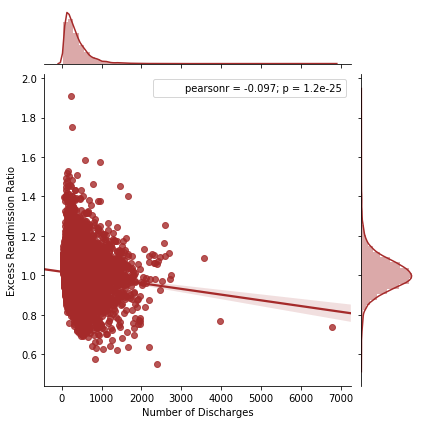

In [124]:
sns.jointplot(discharges, readmission, kind='reg', color = 'brown')